In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
#Loading the data using pandas  
import pandas as pd
import os

data_path = os.path.join("..", "data", "sierraleone-bumbuna.csv")


df = pd.read_csv(data_path)

print("Data loaded successfully!") 
print("Shape:", df.shape)
df.head()

Data loaded successfully!
Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


1.Summary statistics and missing value report

In [3]:
print("Discription of the numric columns")
print(df.describe())

Discription of the numric columns
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   

In [4]:
print("Check if there is any missing value ")

df.isnull().values.any()
print(df.isna().sum())

Check if there is any missing value 
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [5]:
#Finding the Columsa with >5% missing value

per_null = df.isnull().mean()*100
value = per_null[per_null>5].index
print("Columns with >5% null values:")
print(value)

Columns with >5% null values:
Index(['Comments'], dtype='object')


In [6]:
print("The fisrt 5 rows in the dataset ")
df.head()

The fisrt 5 rows in the dataset 


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [7]:
print("An overview of the data set the whole information ")
print(df.info())

An overview of the data set the whole information 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 n

In [8]:
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2021-10-30 00:01
freq                   1


In [10]:
print("The description of all columns:")
print(df.describe(include="all"))

The description of all columns:
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-10-30 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     201.957515     116.376337     113.720571   
std                  NaN     298.495150     218.652659     158.946032   
min                  NaN     -19.500000      -7.800000     -17.900000   
25%                  NaN      -2.800000      -0.300000      -3.800000   
50%                  NaN       0.300000      -0.100000      -0.100000   
75%                  NaN     362.400000     107.000000     224.700000   
max                  NaN    1499.000000     946.000000     892.000000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000

In [11]:
#check if there is duplicate and if there count them 
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

#Cardinality for categoricals if exist
check1 = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in check1}
print("Cardinality (categoricals):", cardinality)

Duplicate rows: 0
Cardinality (categoricals): {'Timestamp': 525600}


Univariate Analysis 

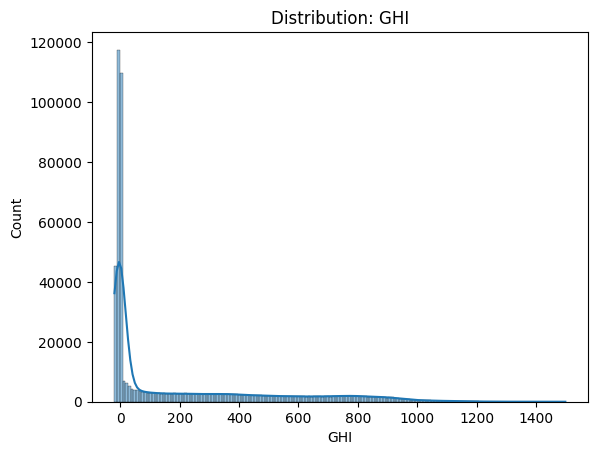

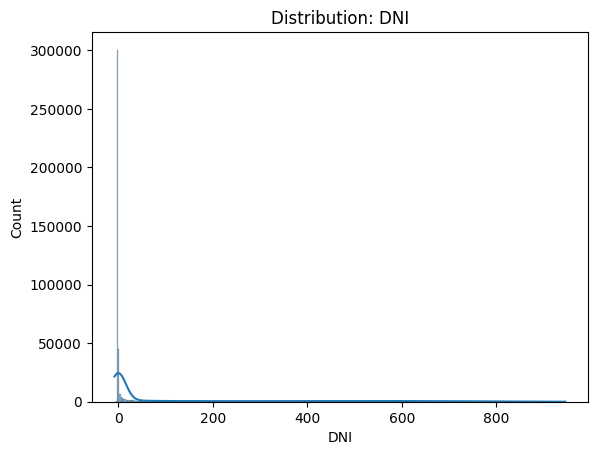

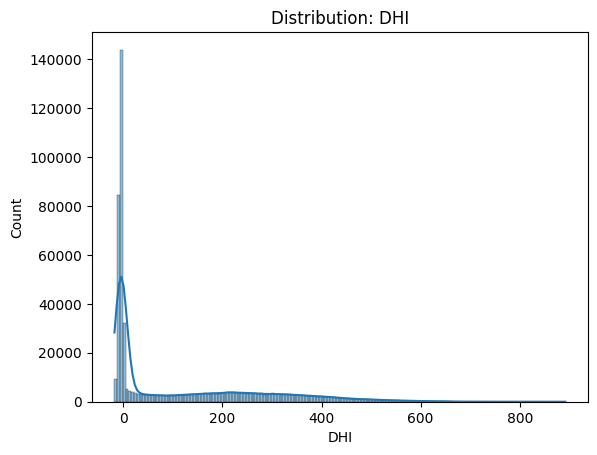

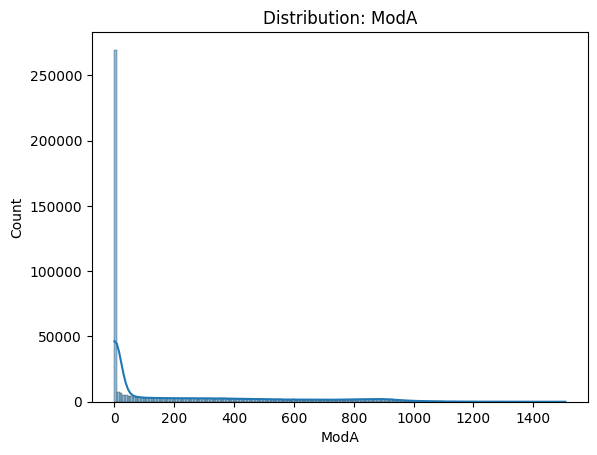

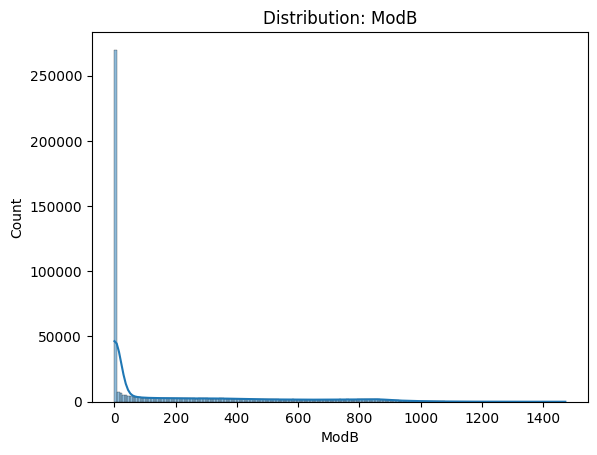

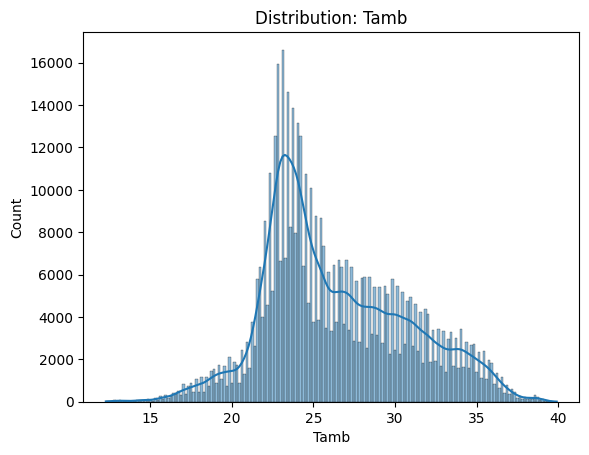

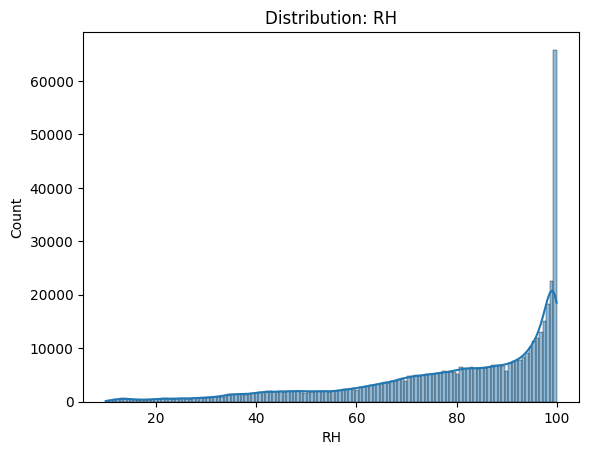

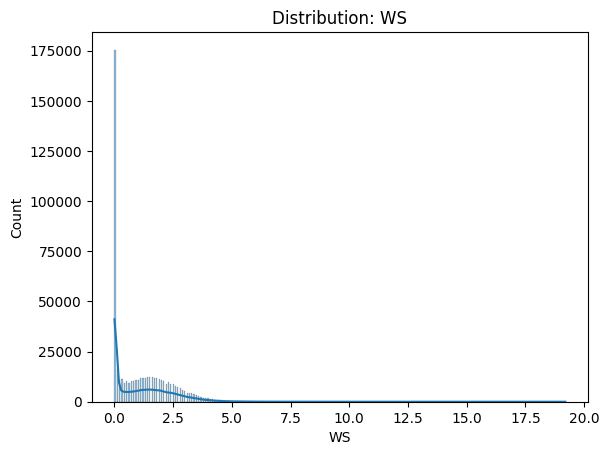

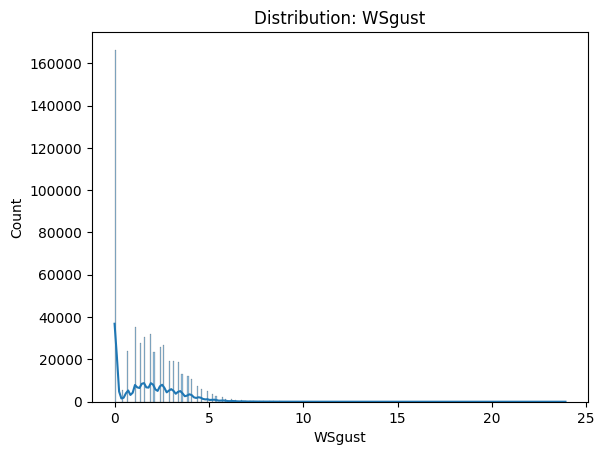

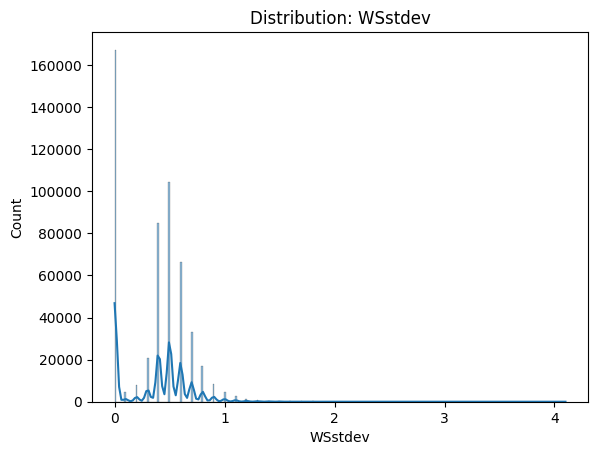

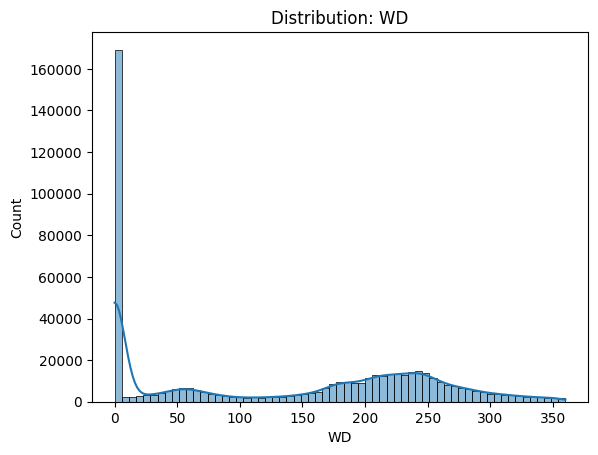

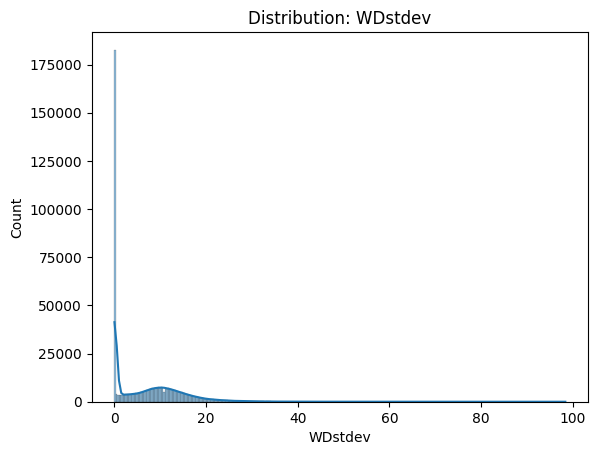

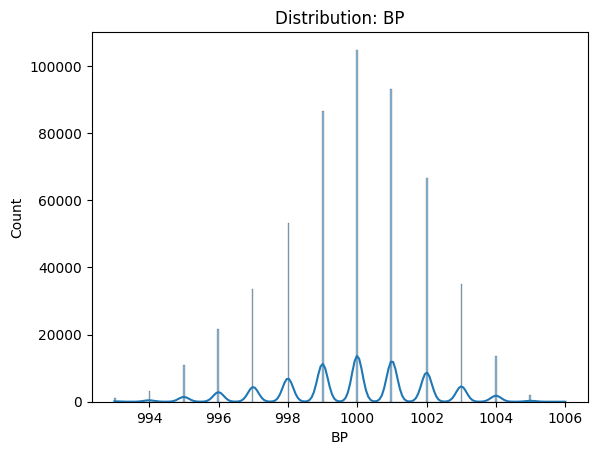

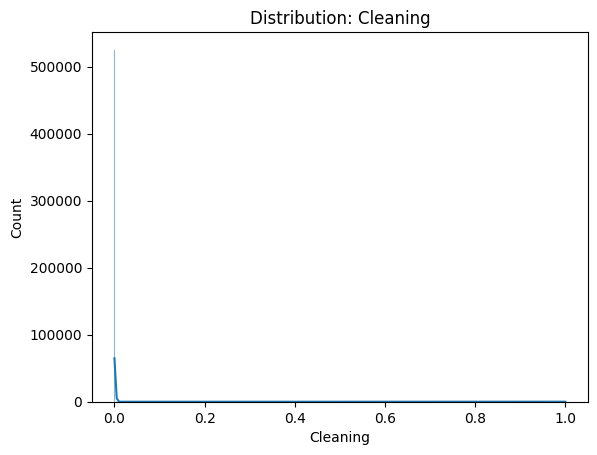

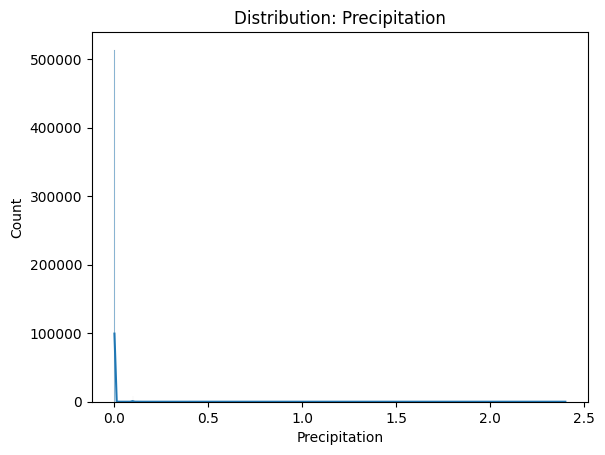

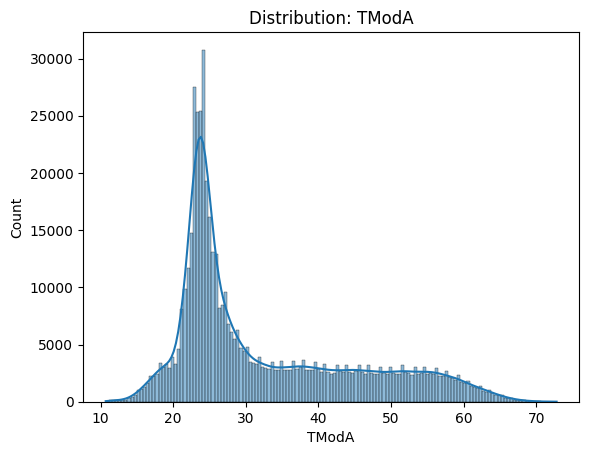

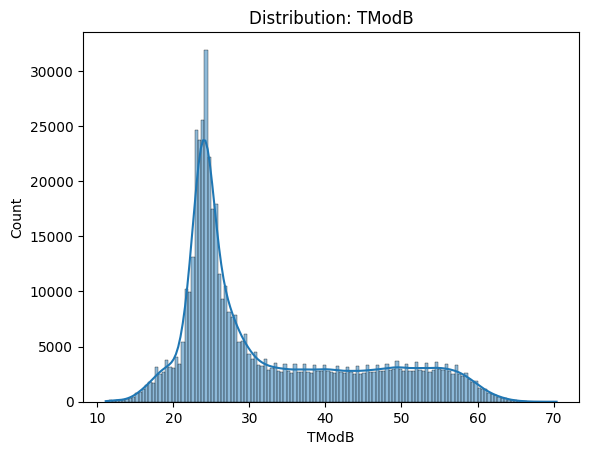

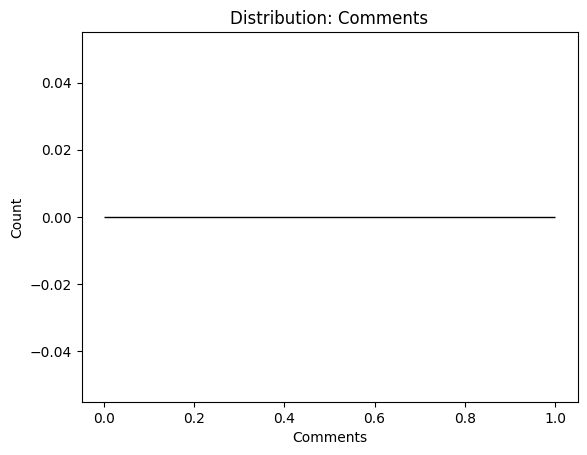

In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

In [13]:
#find the missing and outlier for 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'

check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing = df[check].isnull().sum()
missing_percent = df[check].isnull().mean() * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    '% Missing': missing_percent
})

print("Missing Values Summary:")
print(missing_summary)

Missing Values Summary:
        Missing Values  % Missing
GHI                  0        0.0
DNI                  0        0.0
DHI                  0        0.0
ModA                 0        0.0
ModB                 0        0.0
WS                   0        0.0
WSgust               0        0.0


In [14]:
#Z-score method(|Z|>3) for specific columns
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[cols], nan_policy='omit'))
outlier= (z_scores > 3).any(axis=1)
outliers = df[outlier]

print(f"Number of rows with |Z| > 3: {outliers.shape[0]}")
print("Outlier rows preview:")
print(outliers.head())

Number of rows with |Z| > 3: 16292
Outlier rows preview:
            Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
653  2021-10-30 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
654  2021-10-30 10:55  826.0  263.5  599.6  883.0  861.0  26.0  85.4  1.7   
655  2021-10-30 10:56  851.0  285.0  605.9  912.0  890.0  26.0  84.2  1.6   
656  2021-10-30 10:57  823.0  254.8  603.9  878.0  856.0  26.0  85.3  0.8   
657  2021-10-30 10:58  810.0  244.5  598.8  864.0  843.0  26.1  85.7  0.6   

     WSgust  WSstdev     WD  WDstdev    BP  Cleaning  Precipitation  TModA  \
653     1.1      0.5   81.4      7.9  1002         0            0.0   50.4   
654     2.4      0.4   74.6     12.1  1002         0            0.0   51.6   
655     2.1      0.5   66.4     14.6  1002         0            0.0   52.4   
656     1.6      0.6   90.2      7.0  1002         0            0.0   53.4   
657     1.6      0.6  108.5      7.9  1002         0            0.0   54.6   

     TModB 

In [15]:
#Filling missing values with the median or drop the row if all columns are missing
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df = df.dropna(subset=cols, how='all')
for col in cols:
    median_value = df[col].median()
    df[col].fillna(median_value)

print("Missing values handled:")
print(df[cols].isnull().sum())

Missing values handled:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


Time Series Analysis plot using line chart

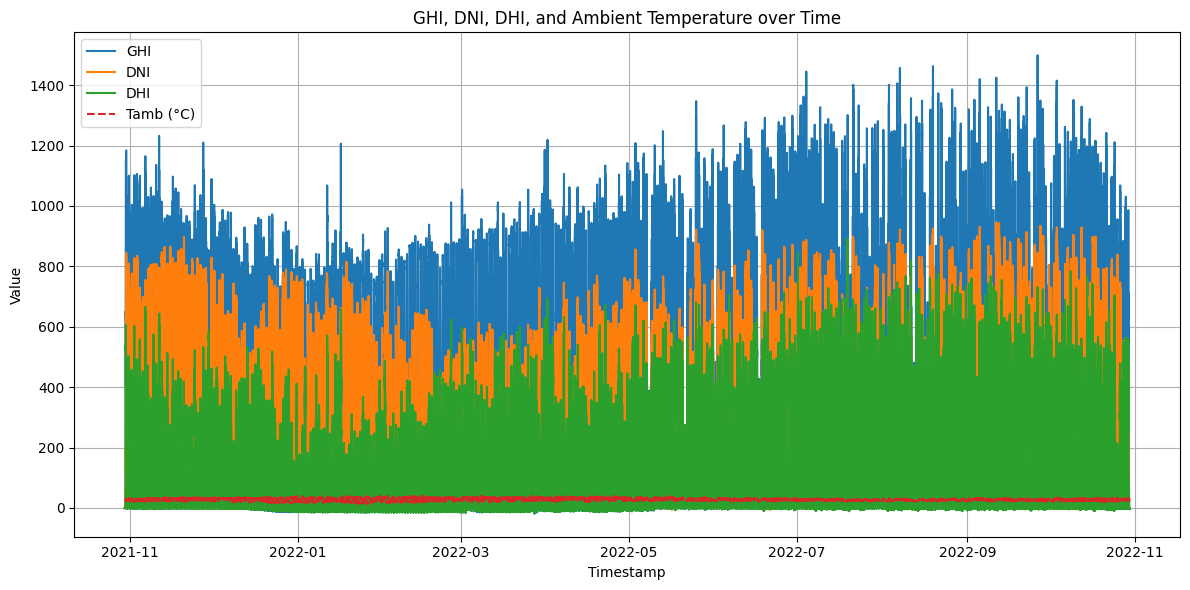

In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


df = df.sort_values('Timestamp')


plt.figure(figsize=(12, 6))

plt.plot(df['Timestamp'], df['GHI'], label='GHI', linewidth=1.5)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', linewidth=1.5)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', linewidth=1.5)
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb (°C)', linewidth=1.5, linestyle='--')

plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('GHI, DNI, DHI, and Ambient Temperature over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


observe patterns by mounth,day or anomalies 


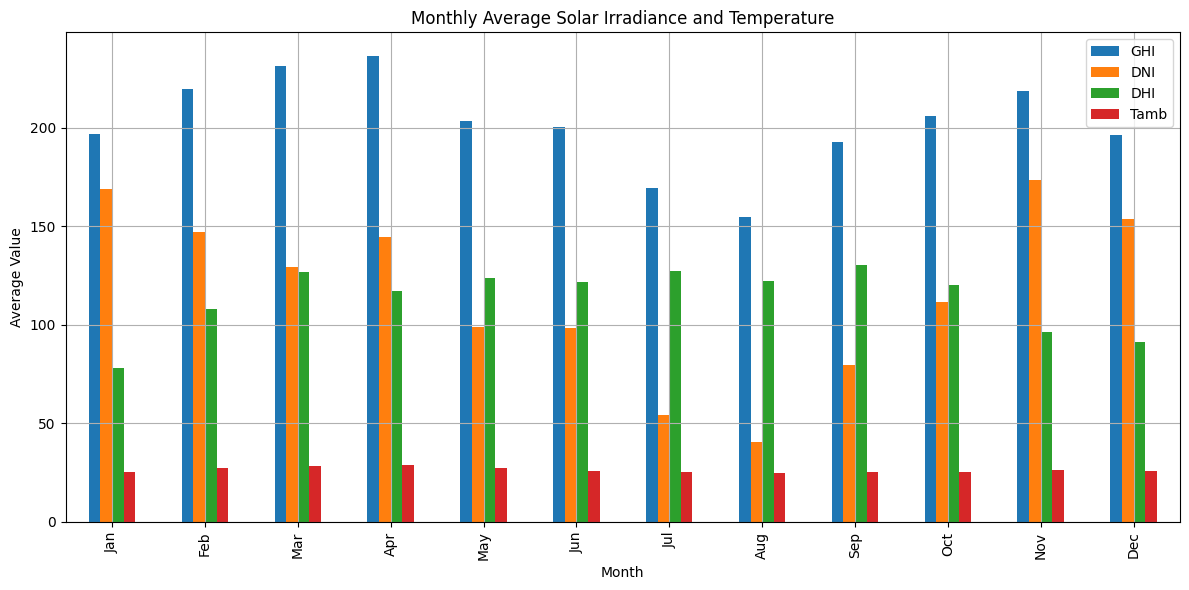

In [17]:
#1.By mounth

df['Timestamp'] = pd.to_datetime(df['Timestamp'])


df['Month'] = df['Timestamp'].dt.month
df['Month_Name'] = df['Timestamp'].dt.strftime('%b')

monthly_avg = df.groupby('Month_Name')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg = monthly_avg.reindex(month_order)

monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title('Monthly Average Solar Irradiance and Temperature')
plt.ylabel('Average Value')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

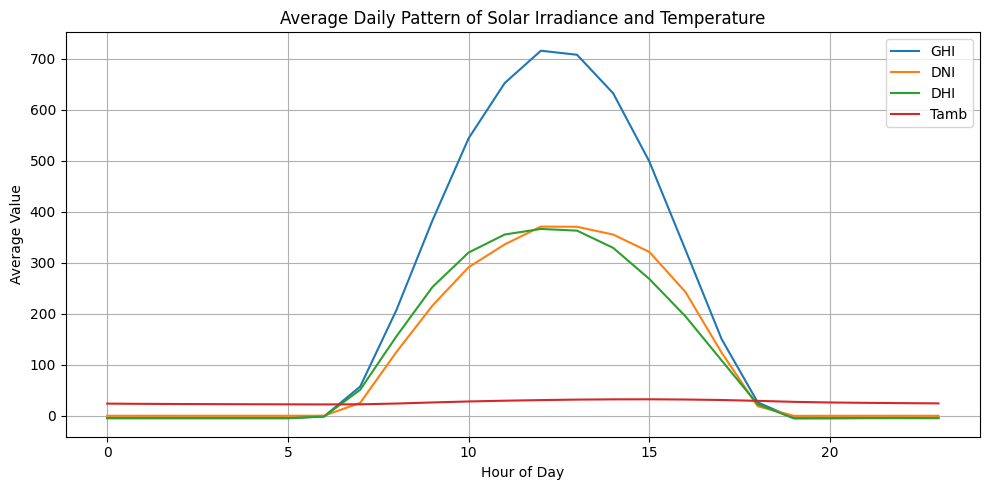

In [18]:
#2. Analyze Trends Throughout the Day
df['Hour'] = df['Timestamp'].dt.hour

hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()


hourly_avg.plot(figsize=(10,5))
plt.title('Average Daily Pattern of Solar Irradiance and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
#3. Identify Anomalies or Spikes

anomalies = df[
    (df['GHI'] > df['GHI'].mean() + 3*df['GHI'].std()) |
    (df['DNI'] > df['DNI'].mean() + 3*df['DNI'].std()) |
    (df['DHI'] > df['DHI'].mean() + 3*df['DHI'].std()) |
    (df['Tamb'] > df['Tamb'].mean() + 3*df['Tamb'].std())
]

print(f"Anomalies detected: {anomalies.shape[0]}")
print(anomalies[['Timestamp', 'GHI', 'DNI', 'DHI', 'Tamb']].head())

Anomalies detected: 11554
              Timestamp    GHI    DNI    DHI  Tamb
653 2021-10-30 10:54:00  814.0  257.0  594.3  25.9
654 2021-10-30 10:55:00  826.0  263.5  599.6  26.0
655 2021-10-30 10:56:00  851.0  285.0  605.9  26.0
656 2021-10-30 10:57:00  823.0  254.8  603.9  26.0
657 2021-10-30 10:58:00  810.0  244.5  598.8  26.1


Cleaning Impact

Average ModA & ModB readings (pre/post cleaning):
  Cleaning        ModA        ModB
0        0  206.578599  198.038150
1        1  273.309252  277.231102


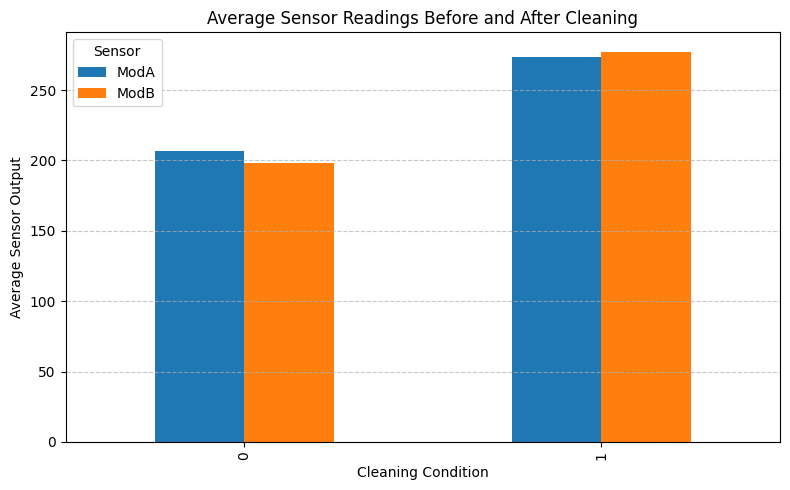

In [20]:
df['Cleaning'] = df['Cleaning'].astype('category')


clean_avg = df.groupby('Cleaning',observed=True)[['ModA', 'ModB']].mean().reset_index()

print("Average ModA & ModB readings (pre/post cleaning):")
print(clean_avg)

clean_avg.plot(
    x='Cleaning',
    y=['ModA', 'ModB'],
    kind='bar',
    figsize=(8, 5)
)

plt.title('Average Sensor Readings Before and After Cleaning')
plt.xlabel('Cleaning Condition')
plt.ylabel('Average Sensor Output')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sensor')
plt.tight_layout()
plt.show()

Correlation and Relationship analysis

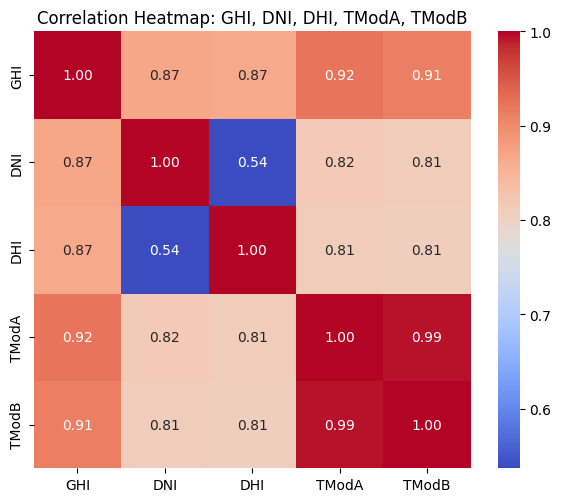

In [21]:
#lets see the strong relation b/n them 
#1.Heatmap of Correlations

correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap: GHI, DNI, DHI, TModA, TModB')
plt.tight_layout()
plt.show()


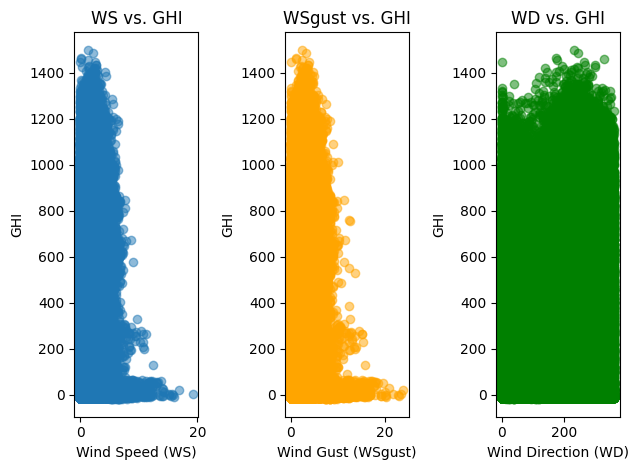

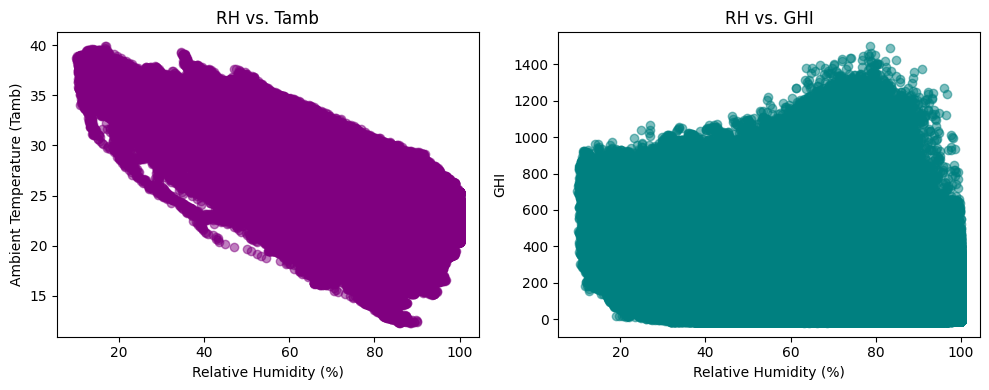

In [22]:
#2. Scatter Plots
#1.Wind Speed & Direction vs. GHI

plt.subplot(1, 3, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.title('WS vs. GHI')

plt.subplot(1, 3, 2)
plt.scatter(df['WSgust'], df['GHI'], alpha=0.5, color='orange')
plt.xlabel('Wind Gust (WSgust)')
plt.ylabel('GHI')
plt.title('WSgust vs. GHI')

plt.subplot(1, 3, 3)
plt.scatter(df['WD'], df['GHI'], alpha=0.5, color='green')
plt.xlabel('Wind Direction (WD)')
plt.ylabel('GHI')
plt.title('WD vs. GHI')

#2.Relative Humidity (RH) vs. Tamb and GHI
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5, color='purple')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('RH vs. Tamb')

plt.subplot(1, 2, 2)
plt.scatter(df['RH'], df['GHI'], alpha=0.5, color='teal')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI')
plt.title('RH vs. GHI')

plt.tight_layout()
plt.show()

Wind and Distribution Analysis

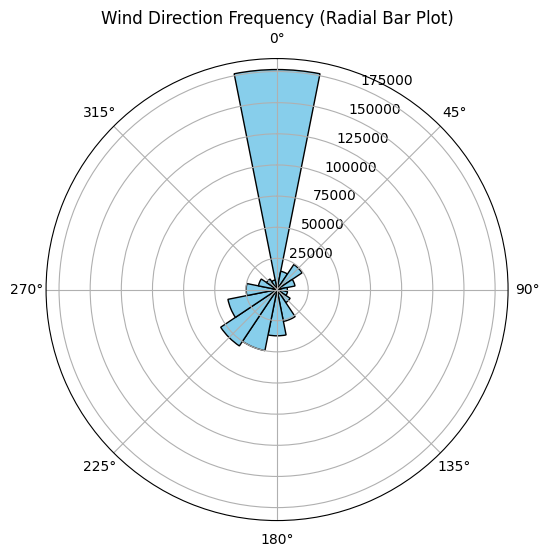

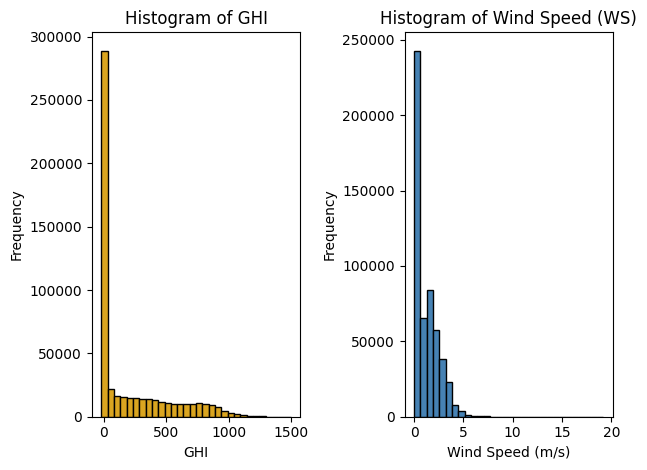

In [23]:
#1. Wind Rose (Radial Bar Plot)
bins = np.arange(0, 361, 22.5)
wind_counts, _ = np.histogram(df['WD'], bins=bins)


angles = np.deg2rad(bins[:-1])
width = np.deg2rad(22.5)


fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.bar(angles, wind_counts, width=width, bottom=0, color='skyblue', edgecolor='black')
ax.set_theta_zero_location('N')  
ax.set_theta_direction(-1)
ax.set_title('Wind Direction Frequency (Radial Bar Plot)')
plt.show()

#2. Histograms for GHI and WS
# GHI histogram
plt.subplot(1,2,1)
plt.hist(df['GHI'].dropna(), bins=30, color='goldenrod', edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')

# WS histogram
plt.subplot(1,2,2)
plt.hist(df['WS'].dropna(), bins=30, color='steelblue', edgecolor='black')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Correlation matrix:
Tamb   -0.791937
DNI    -0.548800
GHI    -0.546677
DHI    -0.431910
RH      1.000000
Name: RH, dtype: float64


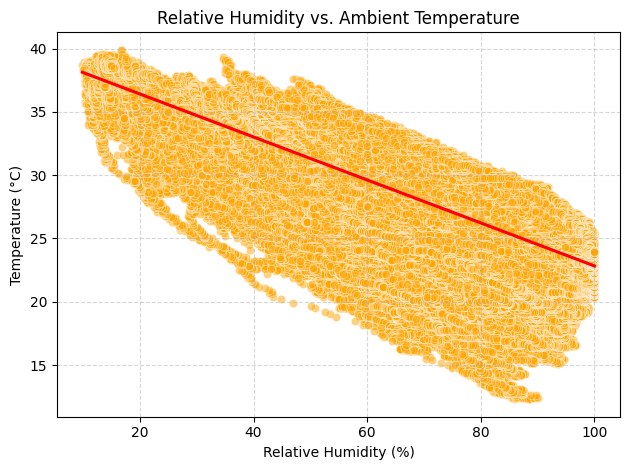

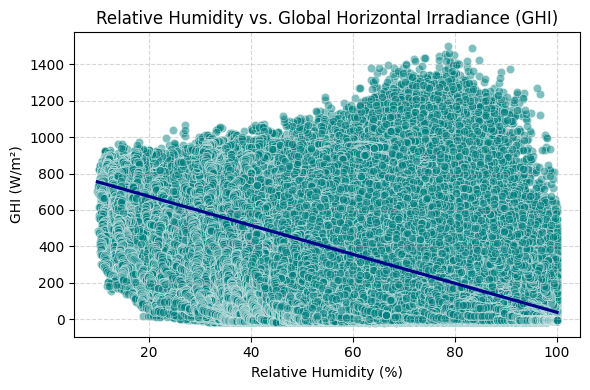

In [24]:
#how humidity affects 
# 1. Correlation & Statistical Relationship
cols = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']

corr = df[cols].corr()

print("Correlation matrix:")
print(corr['RH'].sort_values())

#2. Visual Analysis with Scatter Plots
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.5, color='orange')
sns.regplot(x='RH', y='Tamb', data=df, scatter=False, color='red')
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#3.Humidity vs. Solar Irradiance (GHI)
plt.figure(figsize=(6,4))
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.5, color='teal')
sns.regplot(x='RH', y='GHI', data=df, scatter=False, color='darkblue')
plt.title('Relative Humidity vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

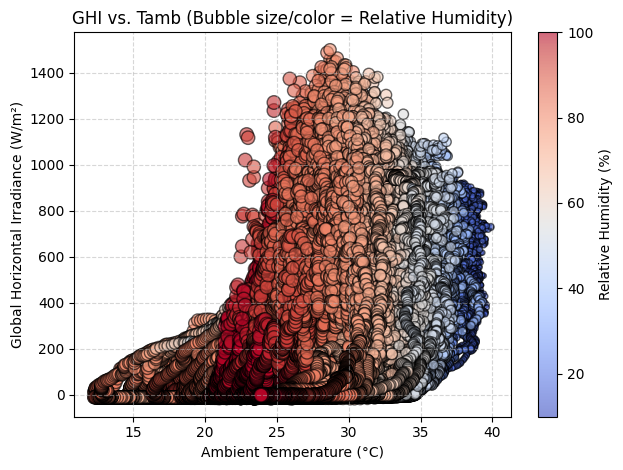

In [25]:
# Bubble chart for GHI vs. Tamb with Bubble Size = RH
plt.scatter(
    df['Tamb'],        
    df['GHI'],         
    s=df['RH'],       
    c=df['RH'],        
    cmap='coolwarm',   
    alpha=0.6,
    edgecolor='k'
)

plt.title('GHI vs. Tamb (Bubble size/color = Relative Humidity)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
cbar = plt.colorbar(label='Relative Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()